Deep Reinforcement Learning: Playing CartPole through Asynchronous Advantage Actor Critic (A3C) with tf.keras and eager execution
https://blog.tensorflow.org/2018/07/deep-reinforcement-learning-keras-eager-execution.html

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import threading
import gym
import multiprocessing
import numpy as np
from queue import Queue
import argparse
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras import layers

tf.enable_eager_execution()


In [2]:
args = {'algorithm':'a3c', 'lr':0.001, 'update-freq':20, 'max-eps':1000, 'gamma':0.99, 'save_dir': "./tmp"}

In [3]:
def record(episode,
           episode_reward,
           worker_idx,
           global_ep_reward,
           result_queue,
           total_loss,
           num_steps):
  """Helper function to store score and print statistics.
  Arguments:
    episode: Current episode
    episode_reward: Reward accumulated over the current episode
    worker_idx: Which thread (worker)
    global_ep_reward: The moving average of the global reward
    result_queue: Queue storing the moving average of the scores
    total_loss: The total loss accumualted over the current episode
    num_steps: The number of steps the episode took to complete
  """
  if global_ep_reward == 0:
    global_ep_reward = episode_reward
  else:
    global_ep_reward = global_ep_reward * 0.99 + episode_reward * 0.01
  print(
      f"Episode: {episode} | "
      f"Moving Average Reward: {int(global_ep_reward)} | "
      f"Episode Reward: {int(episode_reward)} | "
      f"Loss: {int(total_loss / float(num_steps) * 1000) / 1000} | "
      f"Steps: {num_steps} | "
      f"Worker: {worker_idx}"
  )
  result_queue.put(global_ep_reward)
  return global_ep_reward

In [4]:
class RandomAgent:
  """Random Agent that will play the specified game

    Arguments:
      env_name: Name of the environment to be played
      max_eps: Maximum number of episodes to run agent for.
  """
  def __init__(self, env_name, max_eps):
    self.env = gym.make(env_name)
    self.max_episodes = max_eps
    self.global_moving_average_reward = 0
    self.res_queue = Queue()

  def run(self):
    reward_avg = 0
    for episode in range(self.max_episodes):
      done = False
      self.env.reset()
      reward_sum = 0.0
      steps = 0
      while not done:
        # Sample randomly from the action space and step
        _, reward, done, _ = self.env.step(self.env.action_space.sample())
        steps += 1
        reward_sum += reward
      # Record statistics
      self.global_moving_average_reward = record(episode, 
                                                 reward_sum, 
                                                 0,
                                                 self.global_moving_average_reward,
                                                 self.res_queue, 0, steps)

      reward_avg += reward_sum
    final_avg = reward_avg / float(self.max_episodes)
    print("Average score across {} episodes: {}".format(self.max_episodes, final_avg))
    return final_avg

In [5]:
random_agent = RandomAgent("CartPole-v0", 1000)
random_agent.run()

Episode: 0 | Moving Average Reward: 24 | Episode Reward: 24 | Loss: 0.0 | Steps: 24 | Worker: 0
Episode: 1 | Moving Average Reward: 23 | Episode Reward: 13 | Loss: 0.0 | Steps: 13 | Worker: 0
Episode: 2 | Moving Average Reward: 23 | Episode Reward: 19 | Loss: 0.0 | Steps: 19 | Worker: 0
Episode: 3 | Moving Average Reward: 23 | Episode Reward: 20 | Loss: 0.0 | Steps: 20 | Worker: 0
Episode: 4 | Moving Average Reward: 23 | Episode Reward: 32 | Loss: 0.0 | Steps: 32 | Worker: 0
Episode: 5 | Moving Average Reward: 23 | Episode Reward: 16 | Loss: 0.0 | Steps: 16 | Worker: 0
Episode: 6 | Moving Average Reward: 23 | Episode Reward: 15 | Loss: 0.0 | Steps: 15 | Worker: 0
Episode: 7 | Moving Average Reward: 23 | Episode Reward: 11 | Loss: 0.0 | Steps: 11 | Worker: 0
Episode: 8 | Moving Average Reward: 23 | Episode Reward: 12 | Loss: 0.0 | Steps: 12 | Worker: 0
Episode: 9 | Moving Average Reward: 23 | Episode Reward: 23 | Loss: 0.0 | Steps: 23 | Worker: 0
Episode: 10 | Moving Average Reward: 23 

Episode: 391 | Moving Average Reward: 20 | Episode Reward: 19 | Loss: 0.0 | Steps: 19 | Worker: 0
Episode: 392 | Moving Average Reward: 20 | Episode Reward: 24 | Loss: 0.0 | Steps: 24 | Worker: 0
Episode: 393 | Moving Average Reward: 20 | Episode Reward: 44 | Loss: 0.0 | Steps: 44 | Worker: 0
Episode: 394 | Moving Average Reward: 20 | Episode Reward: 16 | Loss: 0.0 | Steps: 16 | Worker: 0
Episode: 395 | Moving Average Reward: 20 | Episode Reward: 11 | Loss: 0.0 | Steps: 11 | Worker: 0
Episode: 396 | Moving Average Reward: 20 | Episode Reward: 12 | Loss: 0.0 | Steps: 12 | Worker: 0
Episode: 397 | Moving Average Reward: 20 | Episode Reward: 33 | Loss: 0.0 | Steps: 33 | Worker: 0
Episode: 398 | Moving Average Reward: 20 | Episode Reward: 31 | Loss: 0.0 | Steps: 31 | Worker: 0
Episode: 399 | Moving Average Reward: 20 | Episode Reward: 24 | Loss: 0.0 | Steps: 24 | Worker: 0
Episode: 400 | Moving Average Reward: 20 | Episode Reward: 32 | Loss: 0.0 | Steps: 32 | Worker: 0
Episode: 401 | Movin

Episode: 786 | Moving Average Reward: 20 | Episode Reward: 11 | Loss: 0.0 | Steps: 11 | Worker: 0
Episode: 787 | Moving Average Reward: 20 | Episode Reward: 18 | Loss: 0.0 | Steps: 18 | Worker: 0
Episode: 788 | Moving Average Reward: 20 | Episode Reward: 26 | Loss: 0.0 | Steps: 26 | Worker: 0
Episode: 789 | Moving Average Reward: 20 | Episode Reward: 18 | Loss: 0.0 | Steps: 18 | Worker: 0
Episode: 790 | Moving Average Reward: 21 | Episode Reward: 38 | Loss: 0.0 | Steps: 38 | Worker: 0
Episode: 791 | Moving Average Reward: 20 | Episode Reward: 13 | Loss: 0.0 | Steps: 13 | Worker: 0
Episode: 792 | Moving Average Reward: 20 | Episode Reward: 10 | Loss: 0.0 | Steps: 10 | Worker: 0
Episode: 793 | Moving Average Reward: 20 | Episode Reward: 16 | Loss: 0.0 | Steps: 16 | Worker: 0
Episode: 794 | Moving Average Reward: 20 | Episode Reward: 26 | Loss: 0.0 | Steps: 26 | Worker: 0
Episode: 795 | Moving Average Reward: 20 | Episode Reward: 15 | Loss: 0.0 | Steps: 15 | Worker: 0
Episode: 796 | Movin

21.176

In [6]:
class ActorCriticModel(keras.Model):
  def __init__(self, state_size, action_size):
    super(ActorCriticModel, self).__init__()
    self.state_size = state_size
    self.action_size = action_size
    self.dense1 = layers.Dense(100, activation='relu')
    self.policy_logits = layers.Dense(action_size)
    self.dense2 = layers.Dense(100, activation='relu')
    self.values = layers.Dense(1)

  def call(self, inputs):
    # Forward pass
    x = self.dense1(inputs)
    logits = self.policy_logits(x)
    v1 = self.dense2(inputs)
    values = self.values(v1)
    return logits, values

In [7]:
class MasterAgent():
    def __init__(self):
        self.game_name = 'CartPole-v0'
        save_dir = "./tmp"
        self.save_dir = save_dir
        if not os.path.exists(save_dir):
              os.makedirs(save_dir)

        env = gym.make(self.game_name)
        self.state_size = env.observation_space.shape[0]
        self.action_size = env.action_space.n
        self.opt = tf.train.AdamOptimizer(0.001, use_locking=True)
        print(self.state_size, self.action_size)

        self.global_model = ActorCriticModel(self.state_size, self.action_size)  # global network
        self.global_model(tf.convert_to_tensor(np.random.random((1, self.state_size)), dtype=tf.float32))
    
    def train(self):
        res_queue = Queue()

        workers = [Worker(self.state_size,
                          self.action_size,
                          self.global_model,
                          self.opt, res_queue,
                          i, game_name=self.game_name,
                          save_dir=self.save_dir) for i in range(multiprocessing.cpu_count())]

        for i, worker in enumerate(workers):
            print("Starting worker {}".format(i))
            worker.start()

        moving_average_rewards = []  # record episode reward to plot
        while True:
            reward = res_queue.get()
            if reward is not None:
                moving_average_rewards.append(reward)
            else:
                break
        [w.join() for w in workers]

        plt.plot(moving_average_rewards)
        plt.ylabel('Moving average ep reward')
        plt.xlabel('Step')
        plt.savefig(os.path.join(self.save_dir,
                                 '{} Moving Average.png'.format(self.game_name)))
        plt.show()
        
    def play(self):
        env = gym.make(self.game_name).unwrapped
        state = env.reset()
        model = self.global_model
        model_path = os.path.join(self.save_dir, 'model_{}.h5'.format(self.game_name))
        print('Loading model from: {}'.format(model_path))
        model.load_weights(model_path)
        done = False
        step_counter = 0
        reward_sum = 0

        try:
            while not done:
                env.render(mode='rgb_array')
                policy, value = model(tf.convert_to_tensor(state[None, :], dtype=tf.float32))
                policy = tf.nn.softmax(policy)
                action = np.argmax(policy)
                state, reward, done, _ = env.step(action)
                reward_sum += reward
                print("{}. Reward: {}, action: {}".format(step_counter, reward_sum, action))
                step_counter += 1
        except KeyboardInterrupt:
            print("Received Keyboard Interrupt. Shutting down.")
        finally:
            env.close()

In [8]:
class Memory:
    def __init__(self):
        self.states = []
        self.actions = []
        self.rewards = []
    
    def store(self, state, action, reward):
        self.states.append(state)
        self.actions.append(action)
        self.rewards.append(reward)

    def clear(self):
        self.states = []
        self.actions = []
        self.rewards = []

In [9]:
class Worker(threading.Thread):
  # Set up global variables across different threads
  global_episode = 0
  # Moving average reward
  global_moving_average_reward = 0
  best_score = 0
  save_lock = threading.Lock()

  def __init__(self,
               state_size,
               action_size,
               global_model,
               opt,
               result_queue,
               idx,
               game_name='CartPole-v0',
               save_dir='/tmp'):
    super(Worker, self).__init__()
    self.state_size = state_size
    self.action_size = action_size
    self.result_queue = result_queue
    self.global_model = global_model
    self.opt = opt
    self.local_model = ActorCriticModel(self.state_size, self.action_size)
    self.worker_idx = idx
    self.game_name = game_name
    self.env = gym.make(self.game_name).unwrapped
    self.save_dir = save_dir
    self.ep_loss = 0.0

  def run(self):
    total_step = 1
    mem = Memory()
    while Worker.global_episode < 100:
      current_state = self.env.reset()
      mem.clear()
      ep_reward = 0.
      ep_steps = 0
      self.ep_loss = 0

      time_count = 0
      done = False
      while not done:
        logits, _ = self.local_model(
            tf.convert_to_tensor(current_state[None, :],
                                 dtype=tf.float32))
        probs = tf.nn.softmax(logits)

        action = np.random.choice(self.action_size, p=probs.numpy()[0])
        new_state, reward, done, _ = self.env.step(action)
        if done:
          reward = -1
        ep_reward += reward
        mem.store(current_state, action, reward)

        if time_count == 20 or done:
          # Calculate gradient wrt to local model. We do so by tracking the
          # variables involved in computing the loss by using tf.GradientTape
          with tf.GradientTape() as tape:
            total_loss = self.compute_loss(done,
                                           new_state,
                                           mem,
                                           0.99)
          self.ep_loss += total_loss
          # Calculate local gradients
          grads = tape.gradient(total_loss, self.local_model.trainable_weights)
          # Push local gradients to global model
          self.opt.apply_gradients(zip(grads,
                                       self.global_model.trainable_weights))
          # Update local model with new weights
          self.local_model.set_weights(self.global_model.get_weights())

          mem.clear()
          time_count = 0

          if done:  # done and print information
            Worker.global_moving_average_reward = \
              record(Worker.global_episode, ep_reward, self.worker_idx,
                     Worker.global_moving_average_reward, self.result_queue,
                     self.ep_loss, ep_steps)
            # We must use a lock to save our model and to print to prevent data races.
            if ep_reward > Worker.best_score:
              with Worker.save_lock:
                print("Saving best model to {}, "
                      "episode score: {}".format(self.save_dir, ep_reward))
                self.global_model.save_weights(
                    os.path.join(self.save_dir,
                                 'model_{}.h5'.format(self.game_name))
                )
                Worker.best_score = ep_reward
            Worker.global_episode += 1
        ep_steps += 1

        time_count += 1
        current_state = new_state
        total_step += 1
    self.result_queue.put(None)

  def compute_loss(self,
                   done,
                   new_state,
                   memory,
                   gamma=0.99):
    if done:
      reward_sum = 0.  # terminal
    else:
      reward_sum = self.local_model(
          tf.convert_to_tensor(new_state[None, :],
                               dtype=tf.float32))[-1].numpy()[0]

    # Get discounted rewards
    discounted_rewards = []
    for reward in memory.rewards[::-1]:  # reverse buffer r
      reward_sum = reward + gamma * reward_sum
      discounted_rewards.append(reward_sum)
    discounted_rewards.reverse()

    logits, values = self.local_model(
        tf.convert_to_tensor(np.vstack(memory.states),
                             dtype=tf.float32))
    # Get our advantages
    advantage = tf.convert_to_tensor(np.array(discounted_rewards)[:, None],
                            dtype=tf.float32) - values
    # Value loss
    value_loss = advantage ** 2

    # Calculate our policy loss
    policy = tf.nn.softmax(logits)
    entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=policy, logits=logits)

    policy_loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=memory.actions,
                                                                 logits=logits)
    policy_loss *= tf.stop_gradient(advantage)
    policy_loss -= 0.01 * entropy
    total_loss = tf.reduce_mean((0.5 * value_loss + policy_loss))
    return total_loss

In [10]:
master = MasterAgent()

4 2


Starting worker 0
Starting worker 1
Starting worker 2
Starting worker 3
Starting worker 4
Starting worker 5
Starting worker 6
Starting worker 7
Episode: 0 | Moving Average Reward: 7 | Episode Reward: 7 | Loss: 1.165 | Steps: 8 | Worker: 4
Saving best model to ./tmp, episode score: 7.0
Episode: 0 | Moving Average Reward: 7 | Episode Reward: 12 | Loss: 1.916 | Steps: 13 | Worker: 1
Episode: 0 | Moving Average Reward: 7 | Episode Reward: 11 | Loss: 1.815 | Steps: 12 | Worker: 2
Saving best model to ./tmp, episode score: 12.0
Episode: 0 | Moving Average Reward: 7 | Episode Reward: 12 | Loss: 1.884 | Steps: 13 | Worker: 6
Episode: 1 | Moving Average Reward: 7 | Episode Reward: 16 | Loss: 2.439 | Steps: 17 | Worker: 0
Saving best model to ./tmp, episode score: 11.0
Saving best model to ./tmp, episode score: 12.0
Saving best model to ./tmp, episode score: 16.0
Episode: 4 | Moving Average Reward: 7 | Episode Reward: 17 | Loss: 2.583 | Steps: 18 | Worker: 3
Saving best model to ./tmp, episode s

Episode: 76 | Moving Average Reward: 17 | Episode Reward: 46 | Loss: 3.027 | Steps: 47 | Worker: 0
Episode: 77 | Moving Average Reward: 17 | Episode Reward: 22 | Loss: 3.403 | Steps: 23 | Worker: 7
Episode: 77 | Moving Average Reward: 17 | Episode Reward: 47 | Loss: 2.978 | Steps: 48 | Worker: 4
Episode: 79 | Moving Average Reward: 17 | Episode Reward: 13 | Loss: 1.409 | Steps: 14 | Worker: 0
Episode: 80 | Moving Average Reward: 17 | Episode Reward: 42 | Loss: 3.217 | Steps: 43 | Worker: 3
Episode: 81 | Moving Average Reward: 18 | Episode Reward: 59 | Loss: 2.99 | Steps: 60 | Worker: 2
Episode: 82 | Moving Average Reward: 18 | Episode Reward: 54 | Loss: 2.876 | Steps: 55 | Worker: 5
Episode: 83 | Moving Average Reward: 18 | Episode Reward: 13 | Loss: 1.434 | Steps: 14 | Worker: 7
Episode: 84 | Moving Average Reward: 18 | Episode Reward: 13 | Loss: 1.389 | Steps: 14 | Worker: 2
Episode: 85 | Moving Average Reward: 18 | Episode Reward: 61 | Loss: 3.349 | Steps: 62 | Worker: 1
Episode: 86

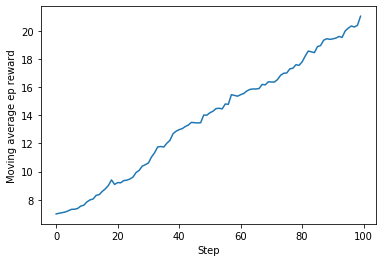

In [11]:
master.train()

In [15]:
master.play()

Loading model from: ./tmp/model_CartPole-v0.h5
0. Reward: 1.0, action: 1
1. Reward: 2.0, action: 0
2. Reward: 3.0, action: 1
3. Reward: 4.0, action: 0
4. Reward: 5.0, action: 1
5. Reward: 6.0, action: 0
6. Reward: 7.0, action: 1
7. Reward: 8.0, action: 0
8. Reward: 9.0, action: 1
9. Reward: 10.0, action: 0
10. Reward: 11.0, action: 1
11. Reward: 12.0, action: 0
12. Reward: 13.0, action: 1
13. Reward: 14.0, action: 0
14. Reward: 15.0, action: 1
15. Reward: 16.0, action: 0
16. Reward: 17.0, action: 1
17. Reward: 18.0, action: 0
18. Reward: 19.0, action: 1
19. Reward: 20.0, action: 0
20. Reward: 21.0, action: 0
21. Reward: 22.0, action: 1
22. Reward: 23.0, action: 0
23. Reward: 24.0, action: 1
24. Reward: 25.0, action: 0
25. Reward: 26.0, action: 1
26. Reward: 27.0, action: 0
27. Reward: 28.0, action: 1
28. Reward: 29.0, action: 0
29. Reward: 30.0, action: 1
30. Reward: 31.0, action: 0
31. Reward: 32.0, action: 1
32. Reward: 33.0, action: 0
33. Reward: 34.0, action: 1
34. Reward: 35.0, ac